# Business Problem

In our days, customers have different shopping habits, they buy and yield a profit to companies. However, each customer has different shopping habits and pays a variable amount of money to companies. This situation pushes companies to divide customers into segments and deal with them with different approaches according to customers' habits. Also, it is significant for companies to predict potential customer commitment to the company. Each big company has to analyze and take some actions to the results of the analysis.

FLO is known as one of the biggest shoe companies in Turkey. In this project, Customer Segmentation with RFM Analysis


# The Story of Dataset
The dataset consists of information obtained from the past shopping behaviors of customers who made their last purchases from Flo as OmniChannel (both online and offline shopper) in the years 2020-2021.

- **master_id:** Unique customer ID
- **order_channel:** Used channel for shopping(Android, iOS, Desktop, Mobile)
- **last_order_channel:** The channel where the most recent purchase was made
- **first_order_date:** Date of the customer's first purchase
- **last_order_date:** Date of the customer's last purchase
- **last_order_date_online:** The date of the last purchase made by the customer on the online platform
- **last_order_date_offline:** The date of the last purchase made by the customer on the offline platform
- **order_num_total_ever_online:** The total number of purchases made by the customer on the online platform
- **order_num_total_ever_offline:** The total number of purchases made by the customer on the offline platform
- **customer_value_total_ever_online:** The total payment by the customer for their online shopping
- **customer_value_total_ever_offline:** The total payment by the customer for their offline shopping
- **interested_in_categories_12:** List of categories the customer has shopped in the last 12 months



In [1]:
# import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.simplefilter(action="ignore")

In [2]:
# Adjusting Row Column Settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [3]:
# Loading the Data Set
df = pd.read_csv("/kaggle/input/dataset/flo_data_20k.csv")

In [4]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(19945, 12)
##################### Types #####################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
##################### Head #####################
                              master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App    

In [5]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


In [6]:
# Total Number of Purchases by Customer

df["Omnichannel"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

In [7]:
# Total Fee Earned by the Customer.

df["TotalPrice"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [8]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel,TotalPrice
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],2.00,209.98


In [9]:
# 10 customers with the highest TotalPrice

df["TotalPrice"].sort_values(ascending=False).head(10)

11150   45905.10
4315    36818.29
7613    33918.10
13880   31227.41
9055    20706.34
7330    18443.57
8068    16918.57
163     12726.10
7223    12282.24
18767   12103.15
Name: TotalPrice, dtype: float64

In [10]:
# Top 10 Values of Total Revenue and Total Number of Products Purchased by Customer

df.groupby("master_id").agg({"Omnichannel":"sum",
                             "TotalPrice":"sum"}).head()

,Omnichannel,TotalPrice
master_id,,
00016786-2f5a-11ea-bb80-000d3a38a36f,5.00,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,3.00,269.47
000be838-85df-11ea-a90b-000d3a38a36f,4.00,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,7.00,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,7.00,1620.33


In [11]:
# Fee Earned by Product

df["SingleProduct"] = df["TotalPrice"] / df["Omnichannel"]

In [12]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel,TotalPrice,SingleProduct
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],5.00,939.37,187.87
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.00,2013.55,95.88
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",5.00,585.32,117.06
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.00,121.97,60.98
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],2.00,209.98,104.99


In [13]:
df["SingleProduct"].sort_values(ascending=False).head(10)

9055    5176.59
13880   2838.86
17323   1106.47
15516   1090.36
6402     862.69
16410    859.58
7936     844.35
9738     837.06
1853     835.88
2291     780.56
Name: SingleProduct, dtype: float64

In [14]:
# Distribution of the Highest Wage Earned on a Single Product Basis by Total Earnings and Total Number of Products

df[["master_id","SingleProduct","Omnichannel","TotalPrice"]].sort_values(by="SingleProduct",ascending=False).head(10)

,master_id,SingleProduct,Omnichannel,TotalPrice
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,5176.59,4.00,20706.34
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,2838.86,11.00,31227.41
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,1106.47,7.00,7745.27
15516,9083981a-f59e-11e9-841e-000d3a38a36f,1090.36,4.00,4361.44
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,862.69,2.00,1725.38
16410,6fecd6c8-261a-11ea-8e1c-000d3a38a36f,859.58,2.00,1719.16
7936,ae4ce104-dbd4-11ea-8757-000d3a38a36f,844.35,3.00,2533.04
9738,3a27b334-dff4-11ea-acaa-000d3a38a36f,837.06,3.00,2511.17
1853,f02473b0-43c3-11eb-806e-000d3a38a36f,835.88,2.00,1671.75
2291,26ac1432-1dd3-11ea-8bf2-000d3a38a36f,780.56,3.00,2341.67


In [15]:
# Total Product Purchased by Categories

df.groupby("interested_in_categories_12")["Omnichannel"].sum()

interested_in_categories_12
[AKTIFCOCUK, AKTIFSPOR]                         1818.00
[AKTIFCOCUK, COCUK, AKTIFSPOR]                  1363.00
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]           1892.00
[AKTIFCOCUK, COCUK, KADIN]                      1388.00
[AKTIFCOCUK, COCUK]                             1699.00
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                  1010.00
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]           1023.00
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]    2888.00
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                910.00
[AKTIFCOCUK, ERKEK, COCUK]                       763.00
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]           1489.00
[AKTIFCOCUK, ERKEK, KADIN]                       535.00
[AKTIFCOCUK, ERKEK]                              912.00
[AKTIFCOCUK, KADIN, AKTIFSPOR]                  1157.00
[AKTIFCOCUK, KADIN]                             1228.00
[AKTIFCOCUK]                                    2814.00
[AKTIFSPOR]                                    14000.00
[COCUK, AKTIFSPOR]  

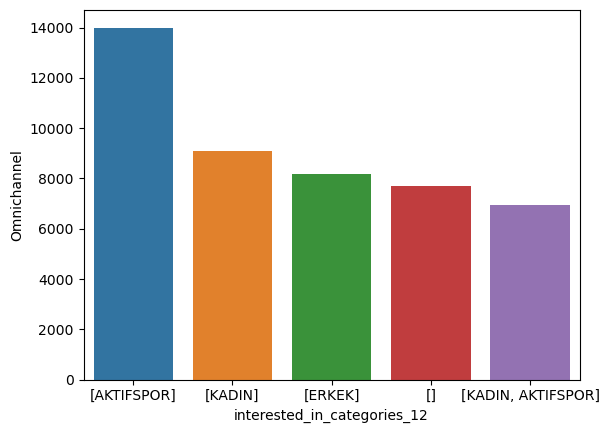

In [16]:
# Top 5 of the Most Purchased Products by Categories

omniyear = df.groupby("interested_in_categories_12")["Omnichannel"].sum().sort_values(ascending=False).reset_index().head()
sns.barplot(x="interested_in_categories_12",y="Omnichannel",data=omniyear)
plt.show(block=True)

In [17]:
# Fee Earned by Categories

df.groupby("interested_in_categories_12")["TotalPrice"].sum()

interested_in_categories_12
[AKTIFCOCUK, AKTIFSPOR]                         296779.06
[AKTIFCOCUK, COCUK, AKTIFSPOR]                  218368.58
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]           299126.43
[AKTIFCOCUK, COCUK, KADIN]                      171474.23
[AKTIFCOCUK, COCUK]                             215160.70
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                  166760.77
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]           152263.38
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]    478597.50
[AKTIFCOCUK, ERKEK, COCUK, KADIN]               133662.73
[AKTIFCOCUK, ERKEK, COCUK]                      106717.78
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]           247415.92
[AKTIFCOCUK, ERKEK, KADIN]                       81493.88
[AKTIFCOCUK, ERKEK]                             136818.50
[AKTIFCOCUK, KADIN, AKTIFSPOR]                  200783.41
[AKTIFCOCUK, KADIN]                             166269.61
[AKTIFCOCUK]                                    353642.83
[AKTIFSPOR]                                 

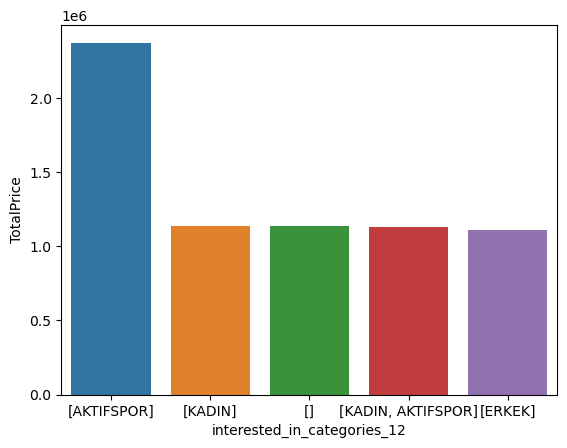

In [18]:
# Top 5 Winning Categories by Category

total_year = df.groupby("interested_in_categories_12")["TotalPrice"].sum().sort_values(ascending=False).reset_index().head()
sns.barplot(x="interested_in_categories_12",y="TotalPrice",data=total_year)
plt.show(block=True)

In [19]:
# We examined the variable types and converted the type of variables that express date to date.

date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [20]:
# Distribution of the number of customers in shopping channels, total number of products purchased and total expenditures

df.groupby("order_channel").agg({"master_id":"count",
                                 "Omnichannel":"sum",
                                 "TotalPrice":"sum"})

,master_id,Omnichannel,TotalPrice
order_channel,,,
Android App,9495,52269.00,7819062.76
Desktop,2735,10920.00,1610321.46
Ios App,2833,15351.00,2525999.93
Mobile,4882,21679.00,3028183.16


In [21]:
# Top 10 customers with the most profits

df.sort_values("TotalPrice", ascending=False)[:10]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel,TotalPrice,SingleProduct
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10,227.25
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.00,1.00,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.00,36818.29,541.45
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10,413.64
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.00,1.00,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.00,31227.41,2838.86
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.00,3.00,18119.14,2587.20,[AKTIFSPOR],4.00,20706.34,5176.59
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57,263.48
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57,241.69
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.00,1.00,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.00,12726.10,343.95
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24,93.76
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.00,2.00,64.97,12038.18,"[ERKEK, KADIN]",20.00,12103.15,605.16


In [22]:
# Top 10 customers with the most orders

df.sort_values("Omnichannel", ascending=False)[:10]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel,TotalPrice,SingleProduct
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10,227.25
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24,93.76
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.00,109.00,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.00,10383.44,93.54
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.00,87.00,8432.25,139.98,[ERKEK],88.00,8572.23,97.41
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.00,81.00,3997.55,242.81,[ERKEK],83.00,4240.36,51.09
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10,413.64
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.00,74.00,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.00,5184.05,67.33
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.00,3.00,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.00,5297.88,70.64
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57,241.69
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57,263.48


# Calculating RFM Metrics

In [23]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [24]:
# Present Date (date of analysis)

today_date = dt.datetime(2021, 6, 1)

In [25]:
today_date

datetime.datetime(2021, 6, 1, 0, 0)

In [26]:
# Calculating RFM Metrics

rfm = df.groupby("master_id").agg({"last_order_date":lambda last_order_date:(today_date-last_order_date.max()),
                                   "Omnichannel": lambda Omnichannel : Omnichannel.sum(),
                                   "TotalPrice":lambda TotalPrice : TotalPrice.sum()})

In [27]:
rfm.head()

,last_order_date,Omnichannel,TotalPrice
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.00,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.00,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.00,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.00,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.00,1620.33


In [28]:
# Changing column names

rfm.columns = ['recency', 'frequency', 'monetary']

In [29]:
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.00,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.00,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.00,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.00,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.00,1620.33


# Calculating RFM Scores (Recency_Score, Frequency_Score, Monetary_Score)

In [30]:
# Calculating Recency_Score

rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

In [31]:
rfm.head()

,recency,frequency,monetary,recency_score
master_id,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.00,776.07,5
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.00,269.47,1
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.00,722.69,2
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.00,874.16,5
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.00,1620.33,5


In [32]:
# Calculating Frequency_Score

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [33]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score
master_id,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.00,776.07,5,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.00,269.47,1,2
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.00,722.69,2,3
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.00,874.16,5,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.00,1620.33,5,4


In [34]:
# Calculating Monetary_Score

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [35]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.00,776.07,5,4,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.00,269.47,1,2,1
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.00,722.69,2,3,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.00,874.16,5,4,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.00,1620.33,5,4,5


In [36]:
# Creating RFM_SCORE VARIABLE

rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

In [37]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.00,776.07,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.00,269.47,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.00,722.69,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.00,874.16,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.00,1620.33,5,4,5,54


In [38]:
# printing scores to csv
# rfm.to_csv("rfm.csv")

# Creating & Analysing RFM Segments

![](https://miro.medium.com/max/617/1*oUKMc3gk53hccFX4YNeu1g.png)

* **Champions** are the best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can be the first to buy new products

* **Potential Loyalists** are the recent customers with average frequency and who spent a good amount. You can make them your Loyalists or Champions by offering membership or loyalty programs or recommending related products to them.

* **New Customers** are the customers who have a high overall RFM score but are not frequent shoppers. Special offers can be provided to increase their visits

* **At Risk Customers** are the customers who purchased often and spent big amounts, but haven’t purchased recently. Personalized deals and product/service recommendations can help reactivate them

* **Can’t Lose Them** are the customers who used to visit and purchase quite often, but haven’t been visiting recently. Get them to revisit with relevant promotions and conduct surveys to find out what went wrong and not lose them to a competitor.

In [39]:
# Creation of a segment map
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [40]:
# Creating segment variable

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [41]:
rfm = rfm.reset_index()

In [42]:
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.00,776.07,5,4,4,54,champions
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.00,269.47,1,2,1,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.00,722.69,2,3,4,23,at_Risk
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.00,874.16,5,4,4,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.00,1620.33,5,4,5,54,champions


In [43]:
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["mean","count"]).T

segment                       about_to_sleep                      at_Risk  \
recency   mean   114 days 00:45:34.510042604  242 days 07:53:45.380710660   
          count                         1643                         3152   
frequency mean                          2.41                         4.47   
          count                         1643                         3152   
monetary  mean                        361.65                       648.33   
          count                         1643                         3152   

segment                           cant_loose         champions  \
recency   mean   235 days 03:49:08.743718592  17 days 03:24:45   
          count                         1194              1920   
frequency mean                         10.72              8.97   
          count                         1194              1920   
monetary  mean                       1481.65           1410.71   
          count                         1194              1920   

segment                          hibernating          loyal_customers  \
recency   mean   247 days 10:13:52.543884092  82 days 13:23:24.800000   
          count                         3589                     3375   
frequency mean                          2.39                     8.36   
          count                         3589                     3375   
monetary  mean                        362.58                  1216.26   
          count                         3589                     3375   

segment                       need_attention               new_customers  \
recency   mean   113 days 00:53:35.880893300  17 days 23:25:45.913818722   
          count                          806                         673   
frequency mean                          3.74                        2.00   
          count                          806                         673   
monetary  mean                        553.44                      344.05   
          count                          806                         673   

segment                 potential_loyalists                   promising  
recency   mean   36 days 20:52:25.846153846  58 days 16:40:14.371257485  
          count                        2925                         668  
frequency mean                         3.31                        2.00  
          count                        2925                         668  
monetary  mean                       533.74                      334.15  
          count                        2925                         668

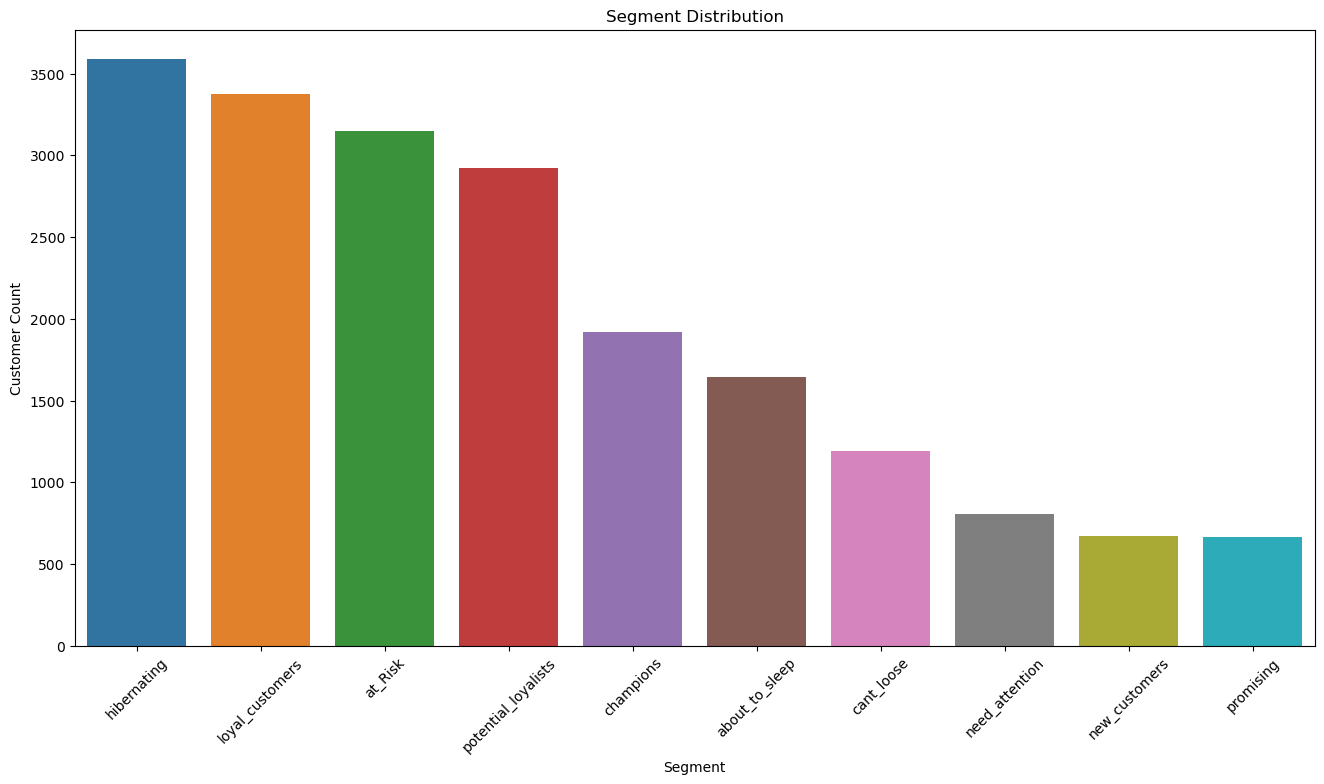

In [44]:
# Segment Distribution
segment_counts = rfm['segment'].value_counts()
plt.figure(figsize=(16, 8))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Segment Analysis
fig = px.scatter(rfm, x='recency', y='frequency', color='segment', title='RFM Segments')
fig.show()

In [46]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency        \
                                           mean count      mean count   
segment                                                                 
about_to_sleep      114 days 00:45:34.510042604  1643      2.41  1643   
at_Risk             242 days 07:53:45.380710660  3152      4.47  3152   
cant_loose          235 days 03:49:08.743718592  1194     10.72  1194   
champions                      17 days 03:24:45  1920      8.97  1920   
hibernating         247 days 10:13:52.543884092  3589      2.39  3589   
loyal_customers         82 days 13:23:24.800000  3375      8.36  3375   
need_attention      113 days 00:53:35.880893300   806      3.74   806   
new_customers        17 days 23:25:45.913818722   673      2.00   673   
potential_loyalists  36 days 20:52:25.846153846  2925      3.31  2925   
promising            58 days 16:40:14.371257485   668      2.00   668   

                    monetary        
                        mean count  
segment                             
about_to_sleep        361.65  1643  
at_Risk               648.33  3152  
cant_loose           1481.65  1194  
champions            1410.71  1920  
hibernating           362.58  3589  
loyal_customers      1216.26  3375  
need_attention        553.44   806  
new_customers         344.05   673  
potential_loyalists   533.74  2925  
promising             334.15   668

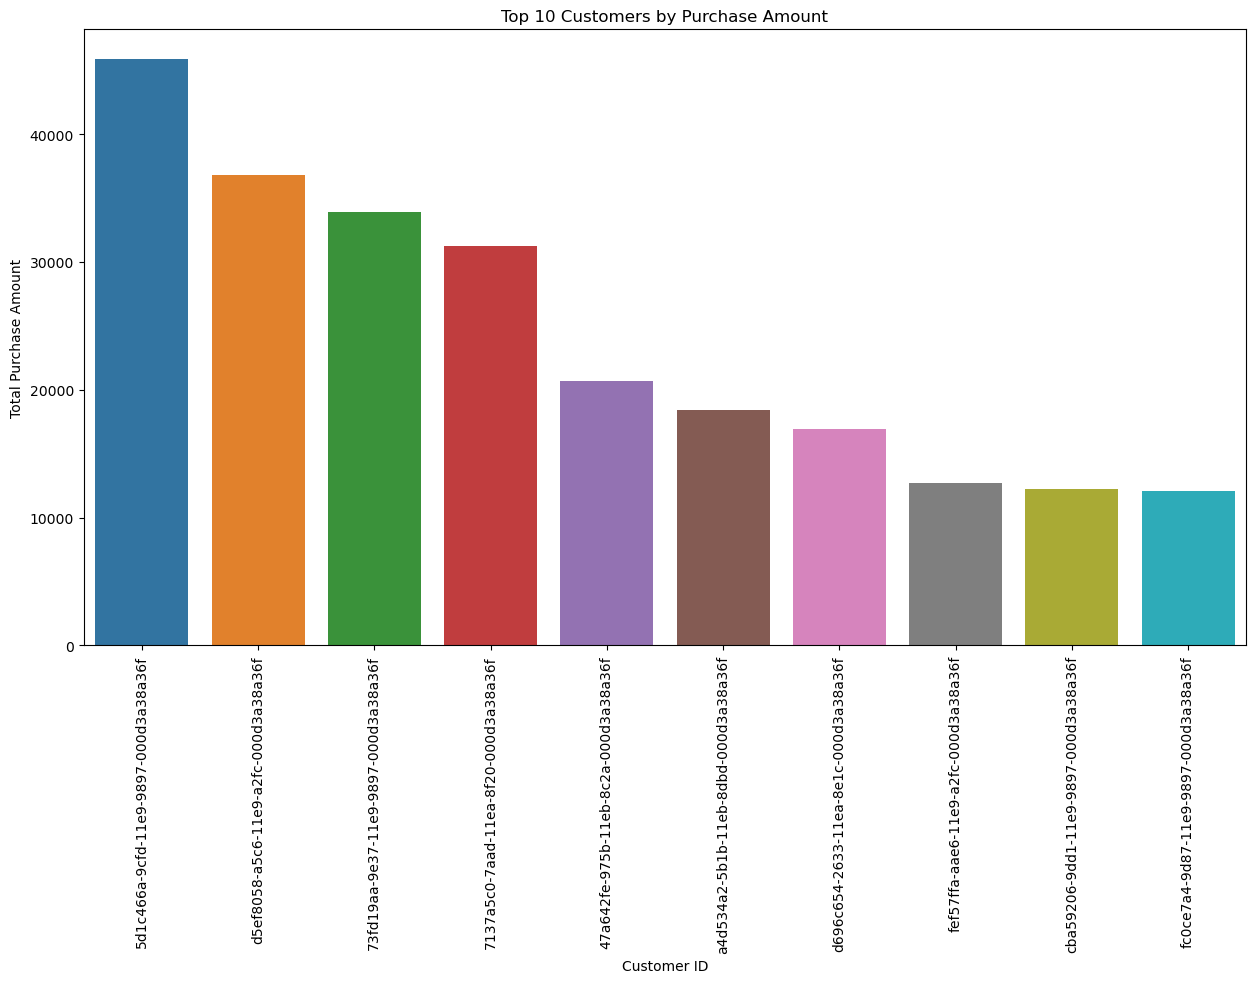

In [47]:
# Top 10 Customers

top_customers = df.groupby('master_id')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(15,8))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Purchase Amount')
plt.xlabel('Customer ID')
plt.xticks(rotation = 90)
plt.ylabel('Total Purchase Amount')
plt.show()

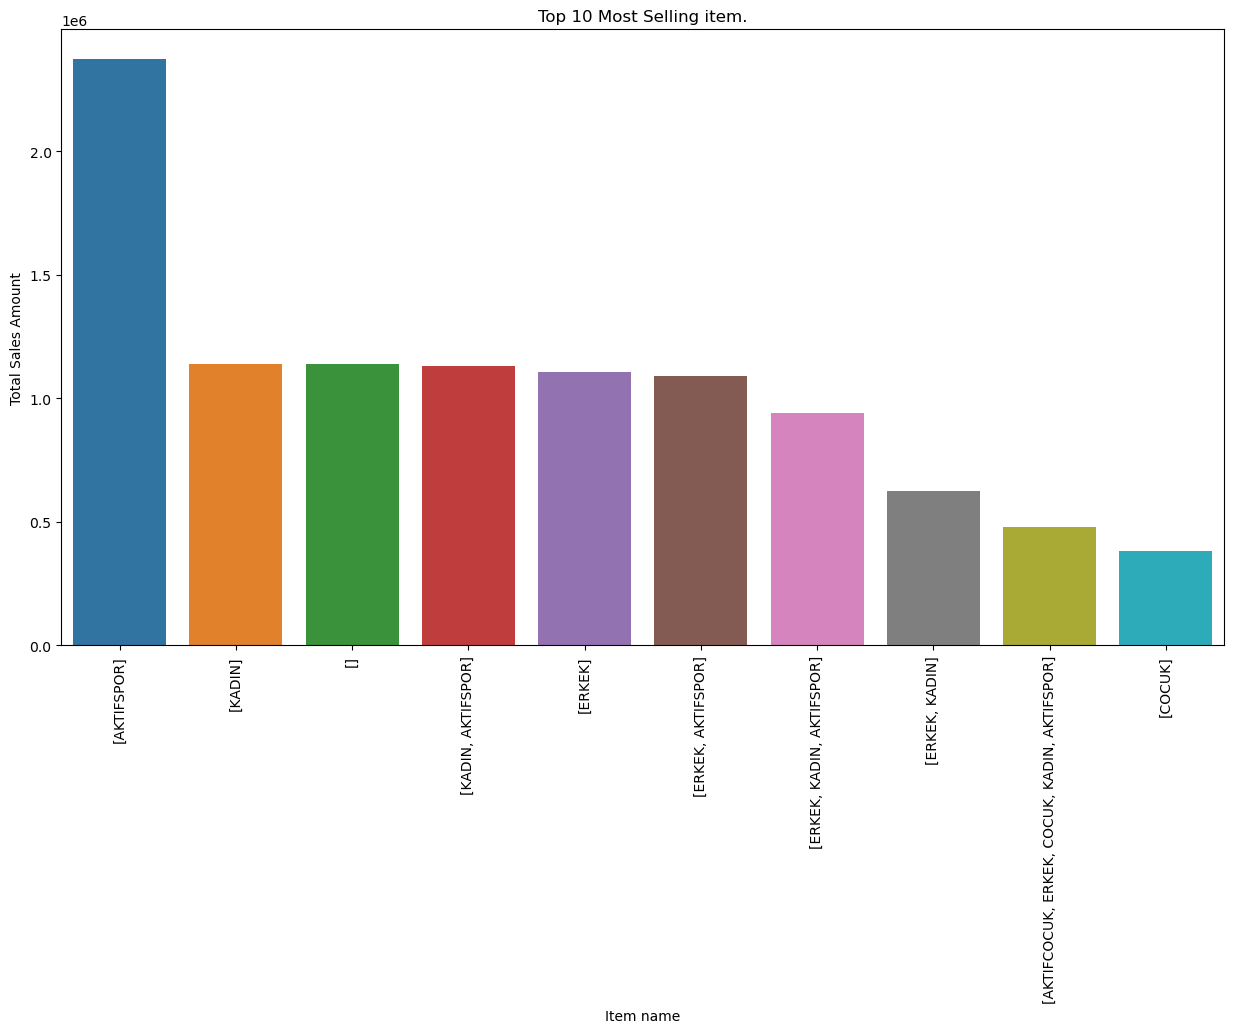

In [48]:
# Top 10 Most Selling Items
top_item = df.groupby('interested_in_categories_12')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(15,8))
sns.barplot(x=top_item.index, y=top_item.values)
plt.title('Top 10 Most Selling item.')
plt.xticks(rotation = 90)
plt.ylabel('Total Sales Amount')
plt.xlabel('Item name')
plt.show()